In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# 1. Data Exploration

In [2]:
data=pd.read_csv(r"C:\Users\hp\Downloads\Waste_Management_and_Recycling_India.csv")
data

,City/District,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Name,"Landfill Location (Lat, Long)",Landfill Capacity (Tons),Year
0,Mumbai,Plastic,6610,68,11191,9,Composting,3056,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
1,Mumbai,Organic,1181,56,11191,5,Composting,2778,12,Mumbai Landfill,"22.4265, 77.4931",45575,2019
2,Mumbai,E-Waste,8162,53,11191,8,Incineration,3390,13,Mumbai Landfill,"22.4265, 77.4931",45575,2019
3,Mumbai,Construction,8929,56,11191,5,Landfill,1498,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
4,Mumbai,Hazardous,5032,44,11191,7,Recycling,2221,16,Mumbai Landfill,"22.4265, 77.4931",45575,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,Gwalior,Plastic,6842,42,11280,8,Recycling,3546,15,Gwalior Landfill,"10.9566, 91.6565",54460,2023
846,Gwalior,Organic,5233,38,11280,10,Recycling,1146,5,Gwalior Landfill,"10.9566, 91.6565",54460,2023
847,Gwalior,E-Waste,9903,41,11280,7,Landfill,3260,4,Gwalior Landfill,"10.9566, 91.6565",54460,2023
848,Gwalior,Construction,7540,77,11280,6,Composting,4220,7,Gwalior Landfill,"10.9566, 91.6565",54460,2023


In [3]:
data.shape

(850, 13)

In [4]:
data.columns

Index(['City/District', 'Waste Type', 'Waste Generated (Tons/Day)',
       'Recycling Rate (%)', 'Population Density (People/km²)',
       'Municipal Efficiency Score (1-10)', 'Disposal Method',
       'Cost of Waste Management (₹/Ton)', 'Awareness Campaigns Count',
       'Landfill Name', 'Landfill Location (Lat, Long)',
       'Landfill Capacity (Tons)', 'Year'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   City/District                      850 non-null    object
 1   Waste Type                         850 non-null    object
 2   Waste Generated (Tons/Day)         850 non-null    int64 
 3   Recycling Rate (%)                 850 non-null    int64 
 4   Population Density (People/km²)    850 non-null    int64 
 5   Municipal Efficiency Score (1-10)  850 non-null    int64 
 6   Disposal Method                    850 non-null    object
 7   Cost of Waste Management (₹/Ton)   850 non-null    int64 
 8   Awareness Campaigns Count          850 non-null    int64 
 9   Landfill Name                      850 non-null    object
 10  Landfill Location (Lat, Long)      850 non-null    object
 11  Landfill Capacity (Tons)           850 non-null    int64 
 12  Year    

In [6]:
data.head()

,City/District,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Name,"Landfill Location (Lat, Long)",Landfill Capacity (Tons),Year
0,Mumbai,Plastic,6610,68,11191,9,Composting,3056,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
1,Mumbai,Organic,1181,56,11191,5,Composting,2778,12,Mumbai Landfill,"22.4265, 77.4931",45575,2019
2,Mumbai,E-Waste,8162,53,11191,8,Incineration,3390,13,Mumbai Landfill,"22.4265, 77.4931",45575,2019
3,Mumbai,Construction,8929,56,11191,5,Landfill,1498,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
4,Mumbai,Hazardous,5032,44,11191,7,Recycling,2221,16,Mumbai Landfill,"22.4265, 77.4931",45575,2019


In [7]:
data.isnull().sum()

City/District                        0
Waste Type                           0
Waste Generated (Tons/Day)           0
Recycling Rate (%)                   0
Population Density (People/km²)      0
Municipal Efficiency Score (1-10)    0
Disposal Method                      0
Cost of Waste Management (₹/Ton)     0
Awareness Campaigns Count            0
Landfill Name                        0
Landfill Location (Lat, Long)        0
Landfill Capacity (Tons)             0
Year                                 0
dtype: int64

# Data Visualization

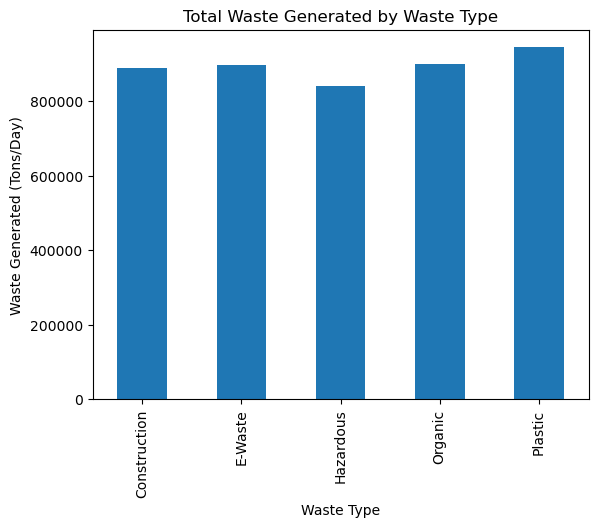

In [8]:
waste_by_type = data.groupby('Waste Type')['Waste Generated (Tons/Day)'].sum()

plt.figure()
waste_by_type.plot(kind='bar')
plt.xlabel('Waste Type')
plt.ylabel('Waste Generated (Tons/Day)')
plt.title('Total Waste Generated by Waste Type')
plt.show()

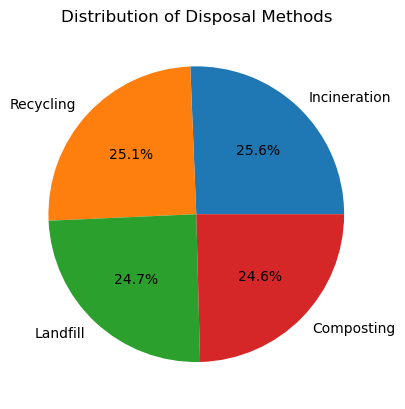

In [9]:
disposal_counts = data['Disposal Method'].value_counts()

plt.figure()
disposal_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Disposal Methods')
plt.show()

<Figure size 640x480 with 0 Axes>

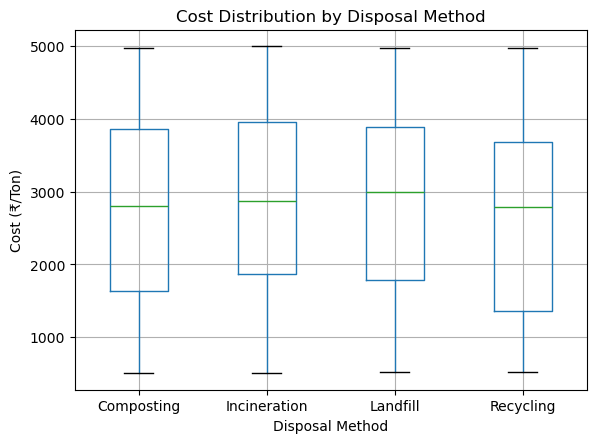

In [10]:
plt.figure()
data.boxplot(column='Cost of Waste Management (₹/Ton)', by='Disposal Method')
plt.xlabel('Disposal Method')
plt.ylabel('Cost (₹/Ton)')
plt.title('Cost Distribution by Disposal Method')
plt.suptitle('')
plt.show()


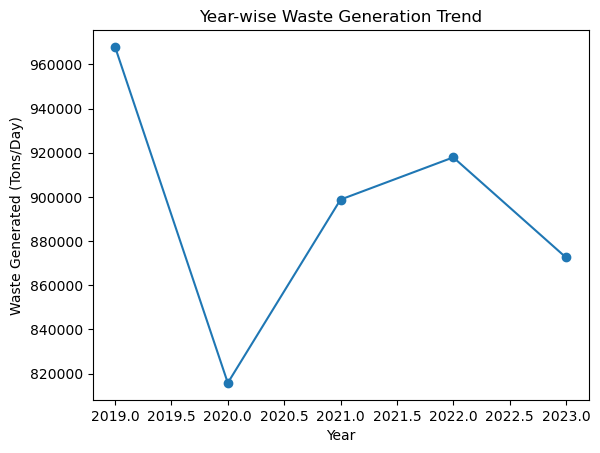

In [11]:
yearly_waste = data.groupby('Year')['Waste Generated (Tons/Day)'].sum()

plt.figure()
yearly_waste.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Waste Generated (Tons/Day)')
plt.title('Year-wise Waste Generation Trend')
plt.show()


# Data Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()

data["City/District"] = le1.fit_transform(data["City/District"])
data["Waste Type"] = le2.fit_transform(data["Waste Type"])
data["Disposal Method"] = le3.fit_transform(data["Disposal Method"])
data["Landfill Name"] = le4.fit_transform(data["Landfill Name"])
data["Landfill Location (Lat, Long)"] = le5.fit_transform(data["Landfill Location (Lat, Long)"])

In [14]:
data=data.drop(["City/District","Landfill Name","Landfill Location (Lat, Long)"],axis=1)
data.head()

,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Capacity (Tons),Year
0,4,6610,68,11191,9,0,3056,14,45575,2019
1,3,1181,56,11191,5,0,2778,12,45575,2019
2,1,8162,53,11191,8,1,3390,13,45575,2019
3,0,8929,56,11191,5,2,1498,14,45575,2019
4,2,5032,44,11191,7,3,2221,16,45575,2019


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x=data.drop("Waste Generated (Tons/Day)",axis=1)
y=data["Waste Generated (Tons/Day)"]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Data Modeling

In [19]:
#Linear Regresion
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)
print("Waste Generated (Tons/Day):",lin_model.score(x_train,y_train))
print("Waste Generated (Tons/Day):",lin_model.score(x_test,y_test))

Waste Generated (Tons/Day): 0.00639311918623886
Waste Generated (Tons/Day): -0.03803921677304256


In [20]:
#Decision Tree Regression
dec_model=DecisionTreeRegressor()
dec_model.fit(x_train,y_train)
print("Waste Generated (Tons/Day):",dec_model.score(x_train,y_train))
print("Waste Generated (Tons/Day):",dec_model.score(x_test,y_test))

Waste Generated (Tons/Day): 1.0
Waste Generated (Tons/Day): -0.9271839559834667


In [21]:
#Randomforest Regression
RFC_model=RandomForestRegressor()
RFC_model.fit(x_train,y_train)
print("Waste Generated (Tons/Day):",RFC_model.score(x_train,y_train))
print("Waste Generated (Tons/Day):",RFC_model.score(x_test,y_test))

Waste Generated (Tons/Day): 0.8460423496659877
Waste Generated (Tons/Day): -0.04809544695734913


# Hyperparameter tunning

In [24]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.model_selection import train_test_split

X = data.drop('Waste Generated (Tons/Day)', axis=1)   # change target name if needed
y = data['Waste Generated (Tons/Day)']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_rf.fit(x_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: -0.1042181335513808


In [33]:
best_rf = grid_rf.best_estimator_
best_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)

# Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
scores = cross_val_score(RFC_model,x,y, cv=5)
score=scores.mean()

In [37]:
score

np.float64(-0.1064923425315329)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
RF=RandomForestRegressor(random_state=42)
RF.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

# Saving model

In [33]:
import pickle

In [34]:
with open("RFC_model_pickle.pkl","wb") as model_file:
    pickle.dump(RFC_model,model_file)

In [35]:
with open("RFC_model_pickle.pkl","rb")as d:
    model=pickle.load(d)

# User input method

In [ ]:
import pandas as pd

def user_input_prediction():
    waste_type = input("Enter Waste Type: ")
    disposal_method = input("Enter Disposal Method: ")

    recycling_rate = float(input("Enter Recycling Rate (%): "))
    population_density = float(input("Enter Population Density (People/km²): "))
    efficiency_score = float(input("Enter Municipal Efficiency Score (1-10): "))
    awareness_count = int(input("Enter Awareness Campaigns Count: "))
    cost = float(input("Enter Cost of Waste Management (₹/Ton): "))
    landfill_capacity = float(input("Enter Landfill Capacity (Tons): "))
    year = int(input("Enter Year: "))

    input_df = pd.DataFrame({
        'Waste Type': [waste_type],
        'Disposal Method': [disposal_method],
        'Recycling Rate (%)': [recycling_rate],
        'Population Density (People/km²)': [population_density],
        'Municipal Efficiency Score (1-10)': [efficiency_score],
        'Awareness Campaigns Count': [awareness_count],
        'Cost of Waste Management (₹/Ton)': [cost],
        'Landfill Capacity (Tons)': [landfill_capacity],
        'Year': [year]
    })

    prediction = RFC_model.predict(input_df)

    print("\nPredicted Waste Generated (Tons/Day):", round(prediction[0], 2))


# Call the function
user_input_prediction()
